**CA03 Decision Tree Algorithm** - BSAN 6070

Sarah Olsen✌

This dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of the dataset: 
*   Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ] 
*   Number of attributes (Columns): 7 
*   Number of instances (Rows): 48,842

Using a test set and training set, predetermined by the data in the 'flag' column, we will apply a decision tree algorithm using the seven attributes to predict whether a person's salary is above or below 50k.

For this predictive model, discrete variables makes more sense than the exact numerical values on a scale. That is why the continuous data columns have already been transformed into predetermined data groups/data blocks using the binning/discretization technique.

In [17]:
#Import some useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

#Read in the dataset from Github
data = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true')

#Check the first few rows
data.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

**Question 1.1**

*Why does it makes sense to discretize columns for this prediction problem?*

In this instance, discretisation helps the model handle outliers in each demographic column. By creating a set of contiguous intervals that span the range of variable values, it places outlier values into the lowest or highest interval, with the remaining values of the distribution in their respective 'inlier' bins.

**Question 1.2**

*What might be the issues (if any) if we DID NOT discretize the columns?*

If we used continuous data in the model, we might disproportionately value attributes that have outliers. In this case, the program might try to reduce the continuous variables into a more manageable range. It would make the program more efficient, but the outcomes less accurate.

**PART 1**
 
*1.  Data Quality Analysis (DQA)*

*   Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.
*   Display descriptive statistics of each column
*   Perform necessary data cleansing and transformation based on your 
observations from the data quality analysis

In [ ]:
#Check to make sure all rows and columns have been uploaded
data.shape

(48842, 11)

In [ ]:
#Check the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
#Checking for nan values in each column
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#View the summary statistics of each column in the dataframe
data.describe(include = 'all')
#also could use this code below:
#for (columnName, columnData) in data.iteritems():
#    print('Column Name : ', columnName)
#    print('Summary Statistics : \n', columnData.describe())

hours_per_week_bin occupation_bin  ...   flag             y
count               48842          48842  ...  48842  48842.000000
unique                  5              5  ...      2           NaN
top              b. 31-40   c. Mid - Mid  ...  train           NaN
freq                26639          13971  ...  32561           NaN
mean                  NaN            NaN  ...    NaN      0.239282
std                   NaN            NaN  ...    NaN      0.426649
min                   NaN            NaN  ...    NaN      0.000000
25%                   NaN            NaN  ...    NaN      0.000000
50%                   NaN            NaN  ...    NaN      0.000000
75%                   NaN            NaN  ...    NaN      0.000000
max                   NaN            NaN  ...    NaN      1.000000

[11 rows x 11 columns]

**PART 1**
 
*2.  Data Quality Analysis (DQA)*

First, understand the data. Open the .csv file in an Excel spreadsheet and study the data columns and the data visually. Then, perform EDA (in your Notebook) of the income group with respect to the seven explanatory variables and display graphical representations as shown below. Before you do the EDA, you need to do transform the data into “categorical” columns by doing the “data binning” with respect to SEVEN explanatory variables and their specified number of “bins”. You will also find the “bin” value ranges for each of the seven variables in the graphs. If your EDA data transformation and graphing code is correct the output of your EDA will look like the graphs displayed below. Do all of these inside your Notebook. (Hint: Use Stacked Bar Chart options in MatPlotLib).

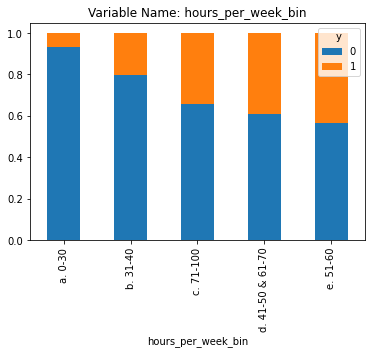

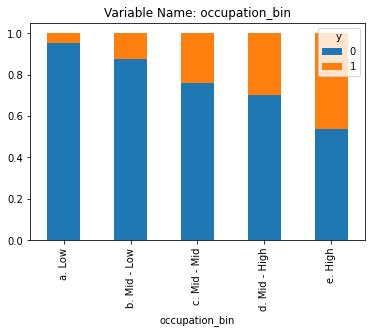

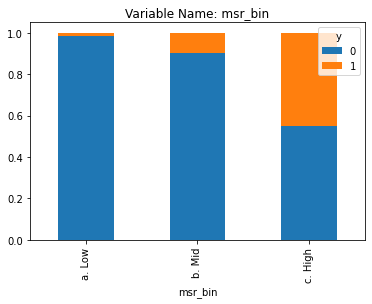

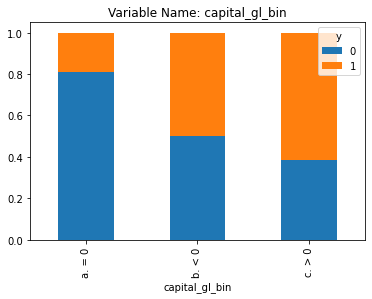

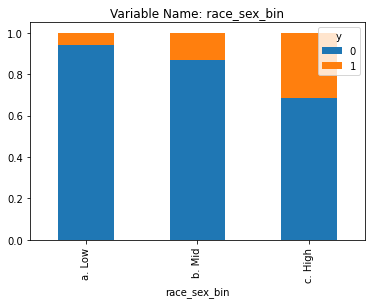

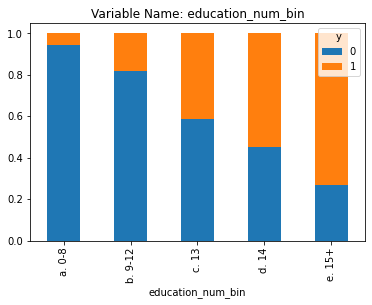

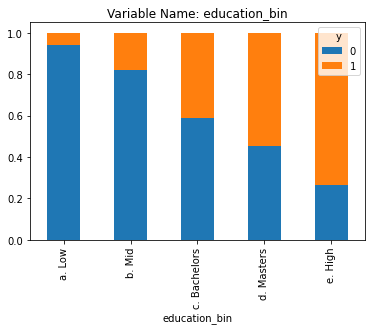

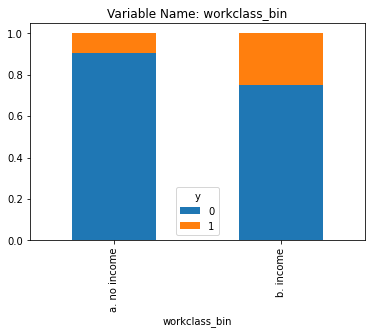

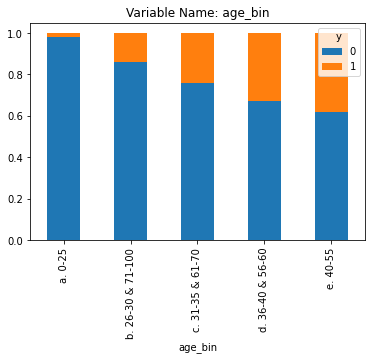

In [ ]:
columns = ['hours_per_week_bin',	'occupation_bin',	'msr_bin',	'capital_gl_bin',	'race_sex_bin',	'education_num_bin',	'education_bin',	'workclass_bin',	'age_bin']
for i in columns:
  pd.crosstab(data[i], data['y'], normalize='index').plot(kind='bar',stacked=True)
  plt.title('Variable Name: {}'.format(i))


**PART 2**
 
*3. Build Decision Tree Classifier Models*

In [ ]:
#Split the data into training and test sets
data_training = data[data['flag']=='train']
data_test = data[data['flag']=='test']

In [ ]:
#Check the test data
data_test.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin  flag  y
32561           b. 31-40   b. Mid - Low   a. Low  ...            a. 0-25  test  0
32562   d. 41-50 & 61-70   b. Mid - Low  c. High  ...   d. 36-40 & 56-60  test  0
32563           b. 31-40  d. Mid - High  c. High  ...  b. 26-30 & 71-100  test  1
32564           b. 31-40   b. Mid - Low  c. High  ...           e. 40-55  test  1
32565            a. 0-30   b. Mid - Low   a. Low  ...            a. 0-25  test  0

[5 rows x 11 columns]

In [ ]:
#Check the training data
data_training.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

In [ ]:
#Assign dependent and independent variables (bins are x, independent, and outcome is y, our target variable)
#Do this for training and test data
x_train = pd.get_dummies(data_training[columns])
y_train = data_training['y']
x_test = pd.get_dummies(data_test[columns])
y_test = data_test['y']

#Check the y_train data
y_train.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: y, dtype: int64

In [ ]:
#Check the x_train data
x_train.head()

hours_per_week_bin_a. 0-30  ...  age_bin_e. 40-55
0                           0  ...                 0
1                           1  ...                 1
2                           0  ...                 0
3                           0  ...                 1
4                           0  ...                 0

[5 rows x 36 columns]

In [ ]:
#Check the x_test data
x_test.head()

hours_per_week_bin_a. 0-30  ...  age_bin_e. 40-55
32561                           0  ...                 0
32562                           0  ...                 0
32563                           0  ...                 0
32564                           0  ...                 1
32565                           1  ...                 0

[5 rows x 36 columns]

In [ ]:
#Check the y_test data
y_test.head()

32561    0
32562    0
32563    1
32564    1
32565    0
Name: y, dtype: int64

In [18]:
#Implement “DecisionTreeClassifier" specified in the project description to build the decision tree

dtree = DecisionTreeClassifier(max_depth = 10,random_state = 101, max_features = None, min_samples_leaf = 15)
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)

**PART 2**
 
*4. Visualize Your Decision Tree using GraphViz*

In [19]:
#Import useful packages
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.955724 to fit



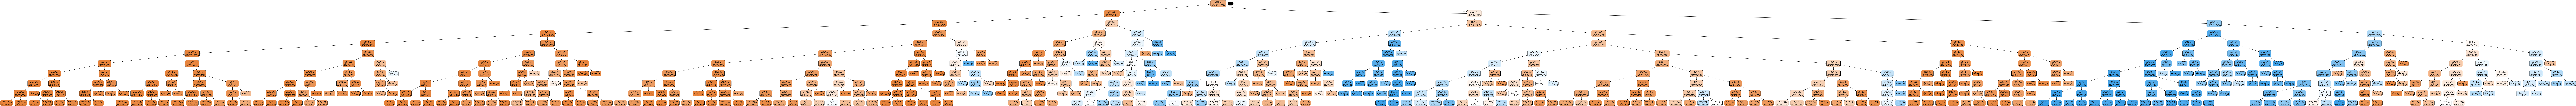

In [20]:
#Create a visualization of the decision tree
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**PART 2**
 
*5. Evaluate Decision Tree Performance*

Calculate and display the following. Do all of these inside your Notebook. 
*  Confusion Matrix (TP, TN, FP, FN ... etc.) 
*  Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
#Create the matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#Create a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

#Give the matrix labels
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Create the labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix
plt.show()

In [ ]:
#Show the accuracy
print(accuracy_score(y_test, y_pred))

In [ ]:
#Show precision of the model
metrics.precision_score(y_test, y_pred)

In [ ]:
#Show the recall score
metrics.recall_score(y_test, y_pred)

In [ ]:
#Show the F1 Score
metrics.f1_score(y_test, y_pred)

In [ ]:
#Show the AUC value
#For binary classification you need to use the metric ROC AUC, not AUC(Area under Curve)
metrics.roc_auc_score(y_test, y_pred)

In [ ]:
#Plot the ROC curve
#You have to get False Positive Rates and True Postive rates for the Classifiers because they will be used to plot the ROC Curve
#This can be done using roc_curve by passing the test datas and predicted data through it
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**PART 3**
 
*6. Tune Decision Tree Performance*

Four Hyperparameters to vary: 
1. Split Criteria – ‘Entropy’ or ‘Gini Impurity’ 
2. Minimum Sample Split – Minimum number of records required in any node for a further split to be attempted 
3. Minimum Sample Leaf – Minimum of samples in a leaf node to stop further 
splitting (becomes a leaf node) 
4. Maximum Depth – Maximum depth of the tree allowed

*Split Criteria - Entropy*

In [ ]:
tree1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=5, min_samples_leaf=10, max_depth=15)
tree1.fit(x_train, y_train)
y_pred1 = tree1.predict(x_test)

accuracy1 = accuracy_score(y_test, y_pred1)

print('Tree 1')
print("Accuracy:",accuracy1,'\n')
print(classification_report(y_test, y_pred1))

In [ ]:
tree2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_samples_leaf=10, max_depth=30)
tree2.fit(x_train, y_train)
y_pred2 = tree2.predict(x_test)

accuracy2 = accuracy_score(y_test, y_pred2)

print('Tree 2')
print("Accuracy:",accuracy2,'\n')
print(classification_report(y_test, y_pred2))

In [ ]:
tree3 = DecisionTreeClassifier(criterion='entropy', min_samples_split=15,min_samples_leaf=5, max_depth=10)
tree3.fit(x_train, y_train)
y_pred3 = tree3.predict(x_test)

accuracy3 = accuracy_score(y_test, y_pred3)

print('Tree 3')
print("Accuracy:",accuracy3,'\n')
print(classification_report(y_test, y_pred3))

In [ ]:
tree4 = DecisionTreeClassifier(criterion='entropy', min_samples_split=10,min_samples_leaf=20, max_depth=5)
tree4.fit(x_train, y_train)
y_pred4 = tree4.predict(x_test)

accuracy4 = accuracy_score(y_test, y_pred4)

print('Tree 4')
print("Accuracy:",accuracy4,'\n')
print(classification_report(y_test, y_pred4))

*Split Criteria - Gini*

In [ ]:
tree5 = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=10, max_depth=15)
tree5.fit(x_train, y_train)
y_pred5 = tree5.predict(x_test)

accuracy5 = accuracy_score(y_test, y_pred5)

print('Tree 5')
print("Accuracy:",accuracy5,'\n')
print(classification_report(y_test, y_pred5))

In [ ]:
tree6 = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=15, max_depth=5)
tree6.fit(x_train, y_train)
y_pred6 = tree6.predict(x_test)

accuracy6 = accuracy_score(y_test, y_pred6)

print('Tree 6')
print("Accuracy:",accuracy6,'\n')
print(classification_report(y_test, y_pred6))

In [ ]:
tree7 = DecisionTreeClassifier(min_samples_split=15,min_samples_leaf=5, max_depth=10)
tree7.fit(x_train, y_train)
y_pred7 = tree7.predict(x_test)

accuracy7 = accuracy_score(y_test, y_pred7)

print('Tree 7')
print("Accuracy:",accuracy7,'\n')
print(classification_report(y_test, y_pred7))

In [ ]:
tree8 = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=20, max_depth=30)
tree8.fit(x_train, y_train)
y_pred8 = tree8.predict(x_test)

accuracy8 = accuracy_score(y_test, y_pred8)

print('Tree 8')
print("Accuracy:",accuracy8,'\n')
print(classification_report(y_test, y_pred8))

**Question 6.1**

*Decision Tree Hyper-parameter Variation vs. Performance*

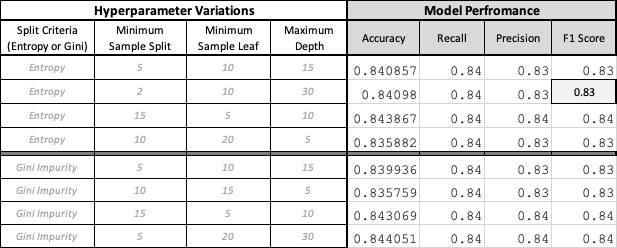

**PART 3**
 
*7. Conclusion*

Explain your observations from the above performance tuning effort.

**Question 7.1**

*How long was your total run time to train the model?*

I can't figure out how to record the time it takes to train the model, but the best tree cell takes zero seconds to run.

**Question 7.2**

*Did you find the BEST TREE?*

Yes! My best tree was Tree8, with the highest accuracy (84.4%), recall, precision, and F1 score.

**Question 7.3**

*Draw the Graph of the BEST TREE Using GraphViz*

In [ ]:
dot_data = StringIO()
export_graphviz(tree8, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Question 7.4**

*What makes it the best tree?*

This is the best tree because it is the most accurate. It predicts the correct category more often than the other models, while maintaining high recall, precision, and F1.

**PART 4**
 
*8. Automation of Performance Tuning*

Instead of running your program manually eight times for eight cases, automate generation of the above “Hyperparameter Vs. Model Performance Table” in your code itself, so that the completed performance table can be displayed with all eight cases by running it only once.

In [32]:
#Read the csv file into notebook and drop the fourth row because it's blank
automated_tuning_data = pd.read_csv('/content/tree_tuning_cases_final_.csv')
automated_tuning_data = pd.DataFrame(automated_tuning_data)
automated_tuning_data = automated_tuning_data.drop(automated_tuning_data.index[4])

# reset index after droping one row (so that we can later loop through)
automated_tuning_data.reset_index(inplace=True)

#Check the data
automated_tuning_data.head(10)

index Split Criteria (Entropy or Gini)  ...  Precision  F1 Score
0      0                          Entropy  ...       0.83      0.83
1      1                          Entropy  ...       0.83      0.83
2      2                          Entropy  ...       0.84      0.84
3      3                          Entropy  ...       0.83      0.83
4      5                    Gini Impurity  ...       0.83      0.83
5      6                    Gini Impurity  ...       0.83      0.83
6      7                    Gini Impurity  ...       0.84      0.84
7      8                    Gini Impurity  ...       0.84      0.84

[8 rows x 9 columns]

In [34]:
#Transform the min split, min leaf, and max depth to intigers
automated_tuning_data['Minimum Sample Split'] = automated_tuning_data['Minimum Sample Split'].astype('int64')
automated_tuning_data['Minimum Sample Leaf'] = automated_tuning_data['Minimum Sample Leaf'].astype('int64')
automated_tuning_data['Maximum Depth'] = automated_tuning_data['Maximum Depth'].astype('int64')
automated_tuning_data.head(10)

index Split Criteria (Entropy or Gini)  ...  Precision  F1 Score
0      0                          Entropy  ...       0.83      0.83
1      1                          Entropy  ...       0.83      0.83
2      2                          Entropy  ...       0.84      0.84
3      3                          Entropy  ...       0.83      0.83
4      5                    Gini Impurity  ...       0.83      0.83
5      6                    Gini Impurity  ...       0.83      0.83
6      7                    Gini Impurity  ...       0.84      0.84
7      8                    Gini Impurity  ...       0.84      0.84

[8 rows x 9 columns]

In [36]:
#Use a for loop to efficiently create the accuracy score and classification report for each set of hyperparameters in the csv file

for i in range(len(automated_tuning_data)):
  if automated_tuning_data['Split Criteria (Entropy or Gini)'][i] == 'Entropy':
    tree = DecisionTreeClassifier(criterion='entropy', 
                                   min_samples_split = automated_tuning_data['Minimum Sample Split'][i],
                                   max_depth = automated_tuning_data['Maximum Depth'][i], 
                                   min_samples_leaf = automated_tuning_data['Minimum Sample Leaf'][i])
    tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    print('Entropy Split, Model',i+1)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ',acc)
    print(classification_report(y_test, y_pred))
  else:
    tree = DecisionTreeClassifier(min_samples_split = automated_tuning_data['Minimum Sample Split'][i],
                                  max_depth = automated_tuning_data['Maximum Depth'][i], 
                                  min_samples_leaf = automated_tuning_data['Minimum Sample Leaf'][i])
    tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    print('Gini Split, Model',i+1)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ',acc)
    print(classification_report(y_test, y_pred))

Entropy Split, Model 1
Accuracy Score:  0.8409188624777347
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Entropy Split, Model 2
Accuracy Score:  0.8409188624777347
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Entropy Split, Model 3
Accuracy Score:  0.8438056630428107
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    a

**PART 5**
 
*9. Prediction using your “trained” Decision Tree Model*

Based on the Performance Tuning effort in the previous section, pick your BEST PERFORMING TREE. Now make prediction of a “new” individual’s Income Category ( <=50K, or >50K ) with the following information. Do this in your Notebook. 

*  Hours Worked per Week = 48 
*  Occupation Category = Mid - Low 
*  Marriage Status & Relationships = High 
*  Capital Gain = Yes 
*  Race-Sex Group = Mid 
*  Number of Years of Education = 12 
*  Education Category = High 
*  Work Class = Income 
*  Age = 58




In [ ]:
#Create a dataframe using the info above
data_for_prediction = pd.DataFrame({'hours_per_week_bin_a. 0-30':[0], 'hours_per_week_bin_b. 31-40':[0], 'hours_per_week_bin_c. 71-100':[0], 'hours_per_week_bin_d. 41-50 & 61-70':[1], 'hours_per_week_bin_e. 51-60':[0], 'occupation_bin_a. Low':[0], 'occupation_bin_b. Mid - Low':[1], 'occupation_bin_c. Mid - Mid':[0], 'occupation_bin_d. Mid - High':[0], 'occupation_bin_e. High':[0], 'msr_bin_a. Low':[0], 'msr_bin_b. Mid':[0], 'msr_bin_c. High':[1], 'capital_gl_bin_a. = 0':[0], 'capital_gl_bin_b. < 0':[0], 'capital_gl_bin_c. > 0':[1], 'race_sex_bin_a. Low':[0], 'race_sex_bin_b. Mid':[1], 'race_sex_bin_c. High':[0], 'education_num_bin_a. 0-8':[0], 'education_num_bin_b. 9-12':[1], 'education_num_bin_c. 13':[0], 'education_num_bin_d. 14':[0], 'education_num_bin_e. 15+':[0], 'education_bin_a. Low':[0], 'education_bin_b. Mid':[0], 'education_bin_c. Bachelors':[0], 'education_bin_d. Masters':[0], 'education_bin_e. High':[1], 'workclass_bin_a. no income':[0], 'workclass_bin_b. income':[1], 'age_bin_a. 0-25':[0], 'age_bin_b. 26-30 & 71-100':[0], 'age_bin_c. 31-35 & 61-70':[0], 'age_bin_d. 36-40 & 56-60':[1], 'age_bin_e. 40-55':[0]})
#Check the data
data_for_prediction

In [ ]:
#This is where I bring back my best tree
best_tree = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=20, max_depth=30)
best_tree.fit(x_train, y_train)

In [ ]:
 #This is where I predict the outcome using the new data

best_tree = DecisionTreeClassifier(max_depth=30, min_samples_leaf=20, min_samples_split=5)
best_tree.fit(x_train, y_train)
y_pred = best_tree.predict(data_for_prediction)
if y_pred == 1:
  print('This persons salary is predicted to be higher than 50k.')
else:
  print('This persons salary is predicted to be below 50k.')

**Question 10.1**

*What is the probability of the outcome of the prediction for this? What is your decision probability threshold and what is your predicted decision based on that?*

The probability of the outcome is 1. The decision probability threshold is 0.5, meaning if a record gets a score above 0.5, the are classified as 1 (>50k income), and if below, classified as 0 (<50k income).

**Question 10.1**

*What is the probability that your outcome prediction is accurate?*

In [ ]:
x_prob=[[0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0]]
y_pred = best_tree.predict(x_prob)
prob = best_tree.predict_proba(x_prob)
print('The probability of the outcome being correct is ',prob[0][y_pred])